# Import requirements

In [11]:
import sys
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
sys.path.append("../src/models")
from INapIKModel import INapIKModel
sys.path.append("../src/utils")
from plotFunctions import plotLowThresholdINapIKVectorField

# Perform model integration

## a. Define constants

In [13]:
i0 = 0
v0 = -45.0
n0 = 0.07
t0 = 0.0
tf = 20.0
dt = 1e-3
eL = -78.0 
nVOneHalf = -45.0, 

## b. Create model and integrator

In [14]:
def i(t):                                                                                                                                 
    return(i0)
ltINapIKModel = INapIKModel.getLowThresholdInstance()
ltINapIKModel.setI(i=i)
integrator = ode(ltINapIKModel.deriv).set_integrator('vode', max_step=dt)

## c. Perform integration

In [15]:
y0 = np.array([v0, n0])
integrator.set_initial_value(y0, t0)
nTSteps = round((tf-t0)/dt)
ys = np.empty((2, nTSteps+1))
ys[:, 0] = y0
t = t0
step = 0
successfulIntegration = True
times = np.empty(nTSteps+1)
while successfulIntegration and step<nTSteps:
    step = step+1
    if step%100==0:
        print('Processing time %.05f out of %.02f' % (t, tf))
        sys.stdout.flush()
    integrator.integrate(t+dt)
    t = integrator.t
    y = integrator.y
    times[step] = t
    ys[:, step] = y

Processing time 0.09900 out of 20.00
Processing time 0.19900 out of 20.00
Processing time 0.29900 out of 20.00
Processing time 0.39900 out of 20.00
Processing time 0.49900 out of 20.00
Processing time 0.59900 out of 20.00
Processing time 0.69900 out of 20.00
Processing time 0.79900 out of 20.00
Processing time 0.89900 out of 20.00
Processing time 0.99900 out of 20.00
Processing time 1.09900 out of 20.00
Processing time 1.19900 out of 20.00
Processing time 1.29900 out of 20.00
Processing time 1.39900 out of 20.00
Processing time 1.49900 out of 20.00
Processing time 1.59900 out of 20.00
Processing time 1.69900 out of 20.00
Processing time 1.79900 out of 20.00
Processing time 1.89900 out of 20.00
Processing time 1.99900 out of 20.00
Processing time 2.09900 out of 20.00
Processing time 2.19900 out of 20.00
Processing time 2.29900 out of 20.00
Processing time 2.39900 out of 20.00
Processing time 2.49900 out of 20.00
Processing time 2.59900 out of 20.00
Processing time 2.69900 out of 20.00
P

# Plot phase space and voltages

<IPython.core.display.Javascript object>


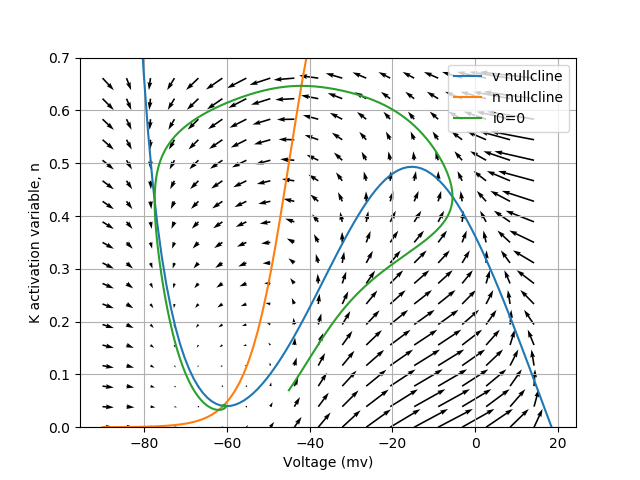

<IPython.core.display.Javascript object>


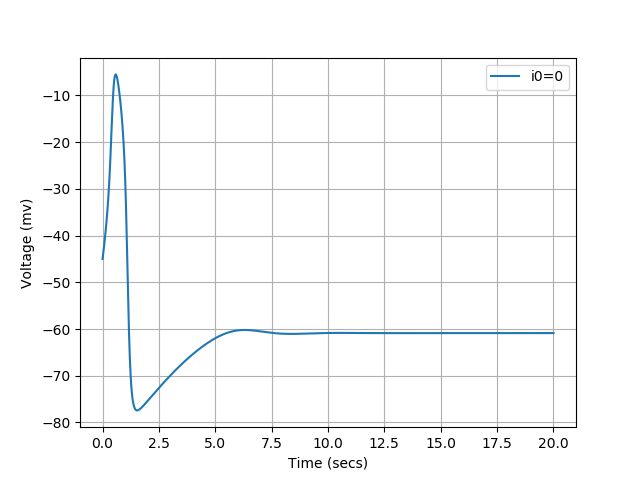

In [18]:
%matplotlib notebook

phaseFigFilename = 'figures/fig4-4bPhaseSpace.eps'
voltageFigFilename = 'figures/fig4-4bVoltage.eps'                                                                                         

plt.figure()
plotLowThresholdINapIKVectorField()
plt.plot(ys[0, :], ys[1, :], label="i0=%d"%i0)
plt.grid()
plt.legend()
plt.xlabel('Voltage (mv)')
plt.ylabel('K activation variable, n')
plt.savefig(phaseFigFilename)

plt.figure()
plt.plot(times, ys[0, :], label="i0=%d"%i0)
plt.grid()
plt.legend()
plt.xlabel('Time (secs)')
plt.ylabel('Voltage (mv)')
plt.savefig(voltageFigFilename)